# Regression Discontinuity Design
This is an example from Causal Inference for the Brave and True (
https://matheusfacure.github.io/python-causality-handbook/16-Regression-Discontinuity-Design.html ).
The underlying article is: *The Effect of Alcohol Consumption on Mortality: Regression Discontinuity Evidence from the Minimum Drinking Age* (https://www.aeaweb.org/articles?id=10.1257/app.1.1.164).


In [1]:
import pandas as pd
import numpy as np
from matplotlib import style
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer

In [4]:
#import the data
df = pd.read_csv("./deaths.csv")
#generate a threshold dummy taking the value 1 above 21 years old
df['threshold'] = (df["agecell"] > 21)
#We might need for later also a variable squared and an interaction
df['age_2'] = (df["agecell"]*df["agecell"])
df['age_d'] = (df["agecell"]*df["threshold"])
df.describe()

,agecell,all,allfitted,internal,internalfitted,external,externalfitted,alcohol,alcoholfitted,homicide,...,suicidefitted,mva,mvafitted,drugs,drugsfitted,externalother,externalotherfitted,Unnamed: 19,age_2,age_d
count,50.000000,48.000000,50.000000,48.000000,50.000000,48.000000,50.000000,48.000000,50.000000,48.000000,...,50.000000,48.000000,50.000000,48.000000,50.000000,48.000000,50.000000,0.0,50.000000,50.000000
mean,21.000000,95.672725,95.802842,20.285291,20.281302,75.387433,75.521540,1.257337,1.267447,16.912068,...,12.362850,31.622984,31.679679,4.249660,4.255325,9.598514,9.610208,NaN,442.244623,10.553425
std,1.126957,3.831062,3.286415,2.253907,1.994682,2.986007,2.269975,0.350312,0.259862,0.729982,...,0.759736,2.384977,2.003196,0.615579,0.521440,0.748369,0.465128,NaN,47.346785,11.103014
min,19.068493,88.427760,91.706150,15.977087,16.738130,71.341415,73.157860,0.639138,0.794345,14.947726,...,11.592100,26.855064,27.868282,3.202071,3.448835,7.972546,8.388236,NaN,363.607425,0.000000
25%,20.075342,92.785927,93.040603,18.597655,18.674128,73.042023,74.061250,0.996152,1.072381,16.611996,...,11.612642,30.116604,30.167032,3.754717,3.768833,9.148840,9.347155,NaN,403.020623,0.000000
50%,20.999995,95.686270,95.178303,20.288866,20.537064,74.813250,74.736387,1.211941,1.247127,16.985353,...,12.253097,31.641135,31.732579,4.314018,4.322989,9.560834,9.690198,NaN,440.999790,0.000000
75%,21.924658,98.025753,97.786825,21.976349,21.658084,77.242347,76.063623,1.470119,1.445450,17.288066,...,13.036209,33.096747,33.395112,4.756345,4.679171,10.122496,9.938511,NaN,480.691895,21.924658
max,22.931507,105.268350,102.891760,24.372910,24.043783,83.330986,81.783720,2.519309,1.817360,18.410973,...,13.547069,36.385197,34.817780,5.564563,5.130238,11.482519,10.353402,NaN,525.854013,22.931507


Text(0.5, 0, '')

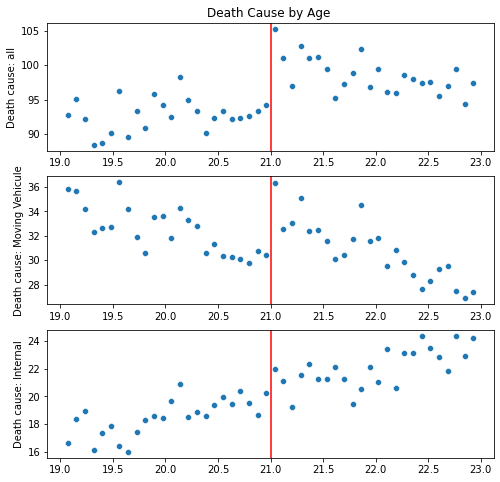

In [3]:
#First let's plot mortality rate (deaths/100k)
#For all type of deaths
plt.figure(figsize=(8,8))
ax = plt.subplot(3,1,1)
sns.scatterplot(x='agecell', y='all', data=df)
plt.title("Death Cause by Age ")
plt.axvline(21, 0,105, color="red")
plt.ylabel('Death cause: all')
plt.xlabel('')

#For moving vehicule accident
ax = plt.subplot(3,1,2, sharex=ax)
sns.scatterplot(x='agecell', y='mva', data=df)
plt.axvline(21, 0,105, color="red")
plt.ylabel('Death cause: Moving Vehicule')
plt.xlabel('')

#For internal causes 
ax = plt.subplot(3,1,3, sharex=ax)
sns.scatterplot(x='agecell', y='internal', data=df)
plt.axvline(21, 0,105, color="red")
plt.ylabel('Death cause: Internal')
plt.xlabel('')

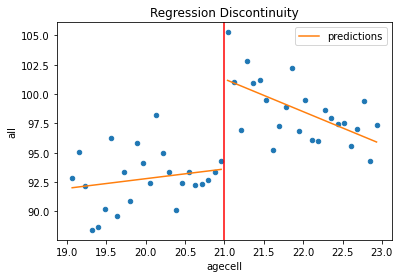

In [16]:
#This model allows to have a discontinuity but also a change of slope (interaction)
model = smf.wls("all~agecell+threshold+agecell*threshold", df).fit()

ax = df.plot.scatter(x="agecell", y="all", color="C0")
df.assign(predictions=model.fittedvalues).plot(x="agecell", y="predictions", ax=ax, color="C1")
plt.title("Regression Discontinuity")
plt.axvline(21, 0,105, color="red")

In [13]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,76.2515,16.396,4.650,0.000,43.207,109.296
threshold[T.True],83.3333,24.357,3.421,0.001,34.245,132.421
agecell,0.8270,0.819,1.010,0.318,-0.823,2.477
agecell:threshold[T.True],-3.6034,1.158,-3.111,0.003,-5.937,-1.269


<Figure size 576x576 with 0 Axes>

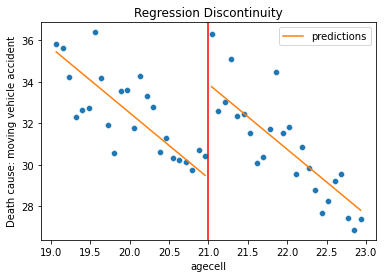

In [17]:
#functional form
plt.figure(figsize=(8,8))
#ax = plt.subplot(3,1,1)
ax = df.plot.scatter(x='agecell', y='mva', color="C0")
sns.scatterplot(x='agecell', y='mva', data=df)
plt.title("Death Cause by Age ")
plt.axvline(21, 0,105, color="red")
plt.ylabel('Death cause: moving vehicle accident')
plt.xlabel('')

model1 = smf.wls("mva~agecell+threshold", df).fit()
df.assign(predictions=model1.fittedvalues).plot(x="agecell", y="predictions", ax=ax, color="C1")
plt.title("Regression Discontinuity");

<Figure size 576x576 with 0 Axes>

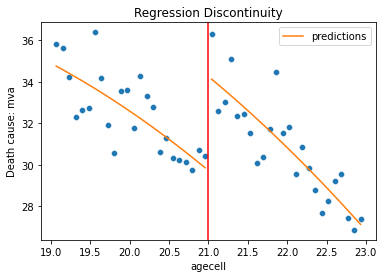

In [18]:
#functional form
plt.figure(figsize=(8,8))
#ax = plt.subplot(3,1,1)
ax = df.plot.scatter(x='agecell', y='mva', color="C0")
sns.scatterplot(x='agecell', y='mva', data=df)
plt.title("Death Cause by Age ")
plt.axvline(21, 0,105, color="red")
plt.ylabel('Death cause: mva')
plt.xlabel('')

model2 = smf.wls("mva~agecell+age_2+threshold", df).fit()

df.assign(predictions=model2.fittedvalues).plot(x="agecell", y="predictions", ax=ax, color="C1")
plt.title("Regression Discontinuity");

In [6]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                    mva   R-squared:                       0.703
Model:                            WLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     53.14
Date:                Mon, 12 Sep 2022   Prob (F-statistic):           1.42e-12
Time:                        15:47:59   Log-Likelihood:                -80.225
No. Observations:                  48   AIC:                             166.4
Df Residuals:                      45   BIC:                             172.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     95.4814      6.755     14.135      0.000      81.876     109.087
agecell       -3.1488      0.337     -9.337      0.000      -3.828      -2.470
threshold      4.5340      0.768      5.904      0.000       2.987       6.081
==============================================================================
Omnibus:                        1.492   Durbin-Watson:                   1.514
Prob(Omnibus):                  0.474   Jarque-Bera (JB):                1.227
Skew:                           0.388   Prob(JB):                        0.542
Kurtosis:                       2.888   Cond. No.                         746.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                    mva   R-squared:                       0.722
Model:                            WLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     38.03
Date:                Mon, 12 Sep 2022   Prob (F-statistic):           2.78e-12
Time:                        15:47:59   Log-Likelihood:                -78.629
No. Observations:                  48   AIC:                             165.3
Df Residuals:                      44   BIC:                             172.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -28.3775     71.524     -0.397      0.693    -172.524     115.769
agecell        8.6820      6.811      1.275      0.209      -5.044      22.408
age_2         -0.2817      0.162     -1.739      0.089      -0.608       0.045
threshold      4.5340      0.751      6.035      0.000       3.020       6.048
==============================================================================
Omnibus:                        1.421   Durbin-Watson:                   1.619
Prob(Omnibus):                  0.491   Jarque-Bera (JB):                1.308
Skew:                           0.386   Prob(JB):                        0.520
Kurtosis:                       2.757   Cond. No.                     1.70e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Figure size 576x576 with 0 Axes>

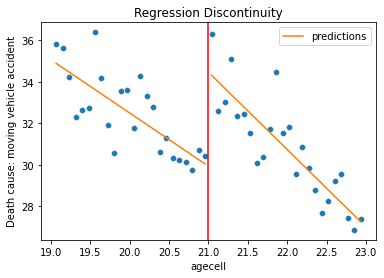

In [23]:
#functional form
plt.figure(figsize=(8,8))
#ax = plt.subplot(3,1,1)
ax = df.plot.scatter(x='agecell', y='mva', color="C0")
sns.scatterplot(x='agecell', y='mva', data=df)
plt.title("Death Cause by Age ")
plt.axvline(21, 0,105, color="red")
plt.ylabel('Death cause: moving vehicle accident')
plt.xlabel('')

model1 = smf.wls("mva~agecell+threshold+agecell*threshold", df).fit()
df.assign(predictions=model1.fittedvalues).plot(x="agecell", y="predictions", ax=ax, color="C1")
plt.title("Regression Discontinuity");

In [20]:
#Better looking table
results1 = smf.ols('mva~threshold', data=df).fit()
results2 = smf.ols('mva~agecell+threshold', data=df).fit()
results3 = smf.ols('mva~agecell+age_2+threshold', data=df).fit()
results4 = smf.ols('mva~agecell+threshold+age_d', data=df).fit()

stargazer_tab = Stargazer([results1, results2,  results3, results4])
# Using a Python interactive window, simply run the 
# name of the object to display the table
stargazer_tab
#note that -1.162*21+28.945=4.543

**Note:**

In [9]:
#Bandwith?
ols1 = smf.ols('mva~agecell+threshold', data=df).fit()
ols2 = smf.ols('mva~agecell+threshold', data=df[(df['agecell']>19.5) & (df['agecell']<22.5)]).fit()
ols3 = smf.ols('mva~agecell+threshold', data=df[(df['agecell']>20) & (df['agecell']<22)]).fit()

stargazer_tab = Stargazer([ols1, ols2, ols3])

stargazer_tab